## Chargement des données de santé

In [1]:
import numpy as np 

donnees_sante = np.genfromtxt("donnees_sante.csv", delimiter=",")
nLig, nCol = donnees_sante.shape
print(f"On a {nLig} lignes et {nCol} colonnes")

On a 768 lignes et 9 colonnes


# Exercices

Voir le sujet donné sur papier

# Question 1
- Nous sommes face à un problème de classification binaire

# Question 2


In [2]:
# On sépare en 2 groupes : entrainement ( training + validation) et test

donnees_sante_train = donnees_sante[:490,:]
donnees_sante_validation = donnees_sante[490:614:,:]
donnees_sante_test = donnees_sante[614:,:]

print(f"On a {donnees_sante_train.shape[0]} lignes et {donnees_sante_train.shape[1]} colonnes pour le training")
print(f"On a {donnees_sante_validation.shape[0]} lignes et {donnees_sante_validation.shape[1]} colonnes pour la validation du training")
print(f"On a {donnees_sante_test.shape[0]} lignes et {donnees_sante_test.shape[1]} colonnes pour le test")

print(f"soit bien un total de {donnees_sante_train.shape[0] + donnees_sante_validation.shape[0] + donnees_sante_test.shape[0]} lignes et {donnees_sante_train.shape[1]} colonnes")

On a 490 lignes et 9 colonnes pour le training
On a 124 lignes et 9 colonnes pour la validation du training
On a 154 lignes et 9 colonnes pour le test
soit bien un total de 768 lignes et 9 colonnes


# Question 3/4


In [3]:
train_data = donnees_sante_train[:,:-1]
train_labels = donnees_sante_train[:,-1]

validation_data = donnees_sante_validation[:,:-1]
validation_labels = donnees_sante_validation[:,-1]

test_data = donnees_sante_test[:,:-1]
test_labels = donnees_sante_test[:,-1]


## Normalisation des données

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

# Construction du réseau de neurones

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [6]:
model = build_model()

# Sans K-FOLD ( training)

In [7]:
history = model.fit(train_data, train_labels, 
                    epochs=200, 
                    batch_size=64, 
                    validation_data=(validation_data, validation_labels))

Epoch 1/200
8/8 [==============================] - 0s 12ms/step - loss: 0.6357 - accuracy: 0.6694 - val_loss: 0.5354 - val_accuracy: 0.8226
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7449 - val_loss: 0.4845 - val_accuracy: 0.8629
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7469 - val_loss: 0.4377 - val_accuracy: 0.8629
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7469 - val_loss: 0.4099 - val_accuracy: 0.8629
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7612 - val_loss: 0.3861 - val_accuracy: 0.8710
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7612 - val_loss: 0.3831 - val_accuracy: 0.8790
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7571 - val_loss: 0.3676 - val_accuracy: 0.8871
Epoch 8/200
8/8 [=========

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history_dict = history.history


history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Loss fn


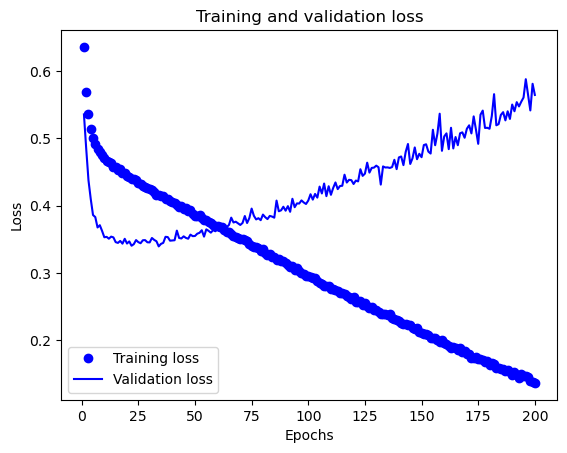

In [10]:
import matplotlib.pyplot as plt
import numpy as np

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Loss fn tronquée


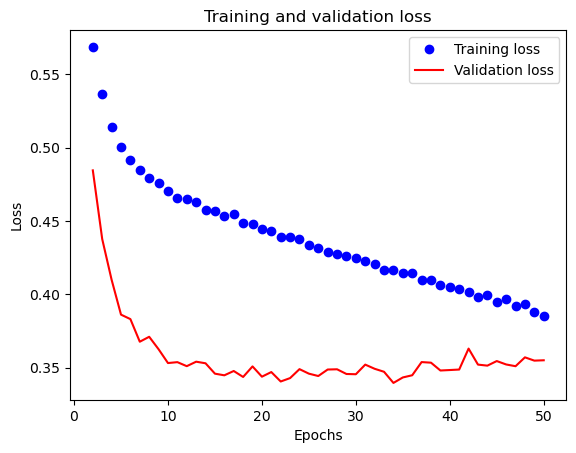

In [11]:
plt.plot(epochs[1:50], loss[1:50], 'bo', label="Training loss")
plt.plot(epochs[1:50], val_loss[1:50], 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Loss fn accuracy

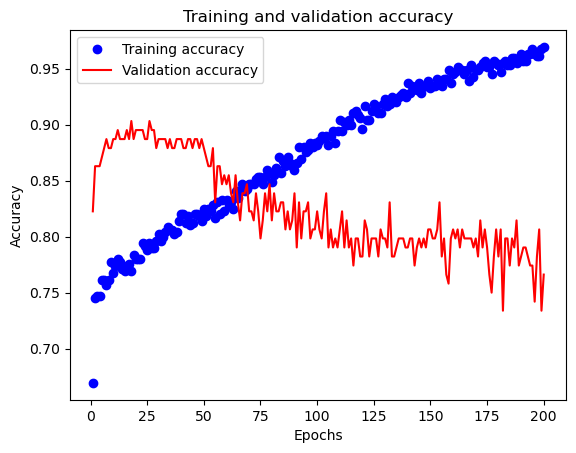

In [12]:

accu = history_dict['accuracy']
val_accu = history_dict['val_accuracy']

plt.plot(epochs, accu, 'bo', label="Training accuracy")
plt.plot(epochs, val_accu, 'r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Loss fn accuracy tronquée

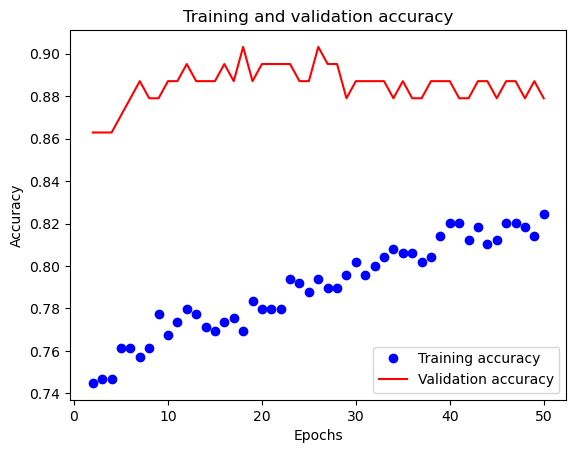

In [13]:
plt.plot(epochs[1:50], accu[1:50], 'bo', label="Training accuracy")
plt.plot(epochs[1:50], val_accu[1:50], 'r', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Nouvel entrainement avec un meilleur nombre d'epochs

In [14]:
model = build_model()

history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_data, validation_labels))

Epoch 1/20
31/31 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6755 - val_loss: 0.4458 - val_accuracy: 0.8387
Epoch 2/20
31/31 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.7510 - val_loss: 0.3907 - val_accuracy: 0.8629
Epoch 3/20
31/31 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7633 - val_loss: 0.3638 - val_accuracy: 0.8548
Epoch 4/20
31/31 [==============================] - 0s 908us/step - loss: 0.4788 - accuracy: 0.7653 - val_loss: 0.3526 - val_accuracy: 0.8629
Epoch 5/20
31/31 [==============================] - 0s 916us/step - loss: 0.4666 - accuracy: 0.7755 - val_loss: 0.3596 - val_accuracy: 0.8629
Epoch 6/20
31/31 [==============================] - 0s 898us/step - loss: 0.4662 - accuracy: 0.7714 - val_loss: 0.3553 - val_accuracy: 0.8790
Epoch 7/20
31/31 [==============================] - 0s 897us/step - loss: 0.4589 - accuracy: 0.7755 - val_loss: 0.3614 - val_accuracy: 0.8710
Epoch 8/20
3

## Loss fn

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


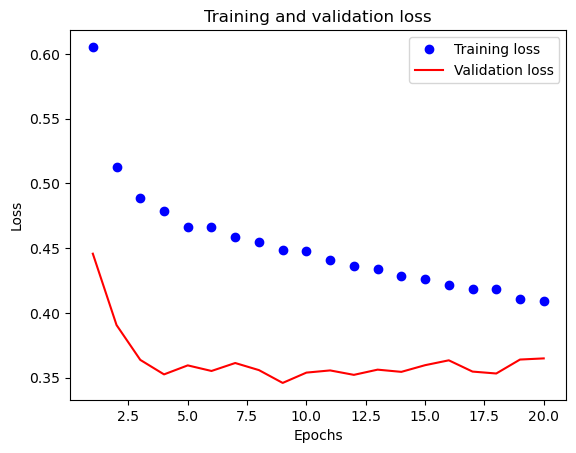

In [15]:
model.summary()

history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## On test notre modèle sur les données de test qu'il n'a jamais vu

In [16]:
model = build_model()

# regouper le training et le validation pour avoir plus de données
train_data = np.concatenate((train_data, validation_data))
train_labels = np.concatenate((train_labels, validation_labels))

history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(test_data, test_labels))



Epoch 1/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6938 - val_loss: 0.5482 - val_accuracy: 0.7792
Epoch 2/20
39/39 [==============================] - 0s 931us/step - loss: 0.4997 - accuracy: 0.7801 - val_loss: 0.4999 - val_accuracy: 0.7857
Epoch 3/20
39/39 [==============================] - 0s 857us/step - loss: 0.4641 - accuracy: 0.7785 - val_loss: 0.4802 - val_accuracy: 0.7857
Epoch 4/20
39/39 [==============================] - 0s 810us/step - loss: 0.4523 - accuracy: 0.7850 - val_loss: 0.4927 - val_accuracy: 0.7727
Epoch 5/20
39/39 [==============================] - 0s 800us/step - loss: 0.4470 - accuracy: 0.7850 - val_loss: 0.4771 - val_accuracy: 0.7727
Epoch 6/20
39/39 [==============================] - 0s 795us/step - loss: 0.4391 - accuracy: 0.7915 - val_loss: 0.4843 - val_accuracy: 0.7662
Epoch 7/20
39/39 [==============================] - 0s 801us/step - loss: 0.4361 - accuracy: 0.7932 - val_loss: 0.4835 - val_accuracy: 0.7727
Epoch 8/

## On trace la courbe de loss fn & accuracy


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


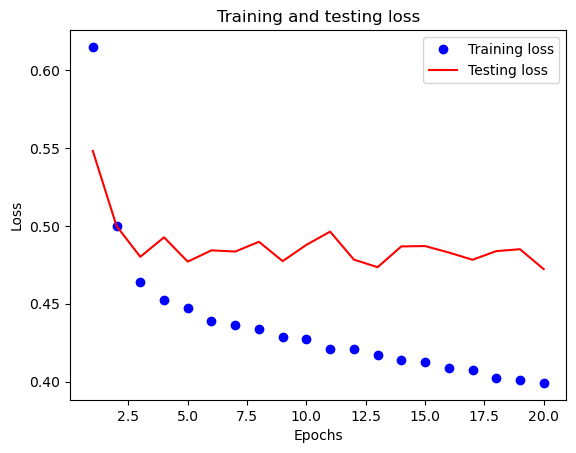

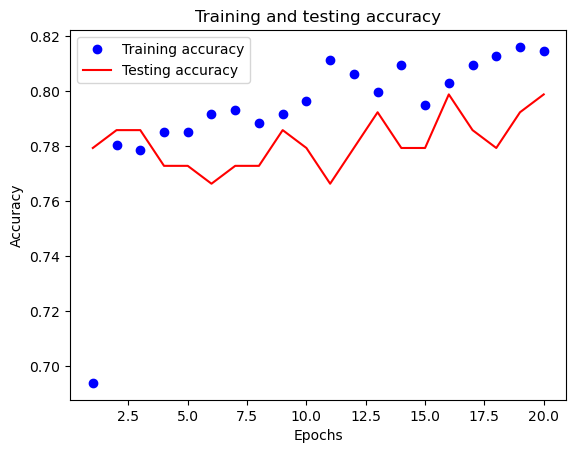

In [17]:
model.summary()

history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Testing loss")
plt.title("Training and testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

accu = history_dict['accuracy']
val_accu = history_dict['val_accuracy']

plt.plot(epochs, accu, 'bo', label="Training accuracy")
plt.plot(epochs, val_accu, 'r', label="Testing accuracy")
plt.title("Training and testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
    

In [18]:
# On arrive à atteindre une précision
print(f"on atteint une précision de {val_accu[-1]*100:1f} sur le test")

on atteint une précision de 79.870129 sur le test


# On fait une prédiction sur un nouveau patient

In [19]:
new_patient = np.array([[1, 122, 70, 27, 0, 36.8, 0.34, 27]])

# On normalise les données
new_patient -= mean
new_patient /= std

In [20]:
prediction = model.predict(new_patient)
# prediction = prediction.numpy()

predicted_labels = np.argmax(prediction, axis=1)
matches = predicted_labels == test_labels


print(f"Le patient a {prediction[0][0]*100:.2f}% de chance de contracter la maladie")
print(f"Le modèle a une précision de {round(matches.mean(),3)} sur le test")

1/1 [==============================] - 0s 34ms/step
Le patient a 34.44% de chance de contracter la maladie
Le modèle a une précision de 0.643 sur le test


# Avec K-FOLD ( training)

In [21]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='rmsprop', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [22]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_loss_histories = []
all_val_loss_histories = []
all_accu_histories = []
all_val_accu_histories = []

for i in range(k):
    print(f"processing fold #{i}")
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_labels = train_labels[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate((train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]))
    partial_train_labels = np.concatenate((train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]))
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, 
                        epochs=num_epochs, 
                        batch_size=16, 
                        validation_data=(val_data, val_labels))
    
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    accu_history = history.history['accuracy']
    val_accu_history = history.history['val_accuracy']
    
    all_loss_histories.append(loss_history)
    all_val_loss_histories.append(val_loss_history)
    all_accu_histories.append(accu_history)
    all_val_accu_histories.append(val_accu_history)

average_loss = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_accu_history = [np.mean([x[i] for x in all_accu_histories]) for i in range(num_epochs)]
average_val_accu_history = [np.mean([x[i] for x in all_val_accu_histories]) for i in range(num_epochs)]

processing fold #0
Epoch 1/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.6616 - val_loss: 0.5337 - val_accuracy: 0.7647
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7874 - val_loss: 0.5000 - val_accuracy: 0.7516
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7874 - val_loss: 0.5078 - val_accuracy: 0.7582
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7983 - val_loss: 0.5151 - val_accuracy: 0.7516
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8113 - val_loss: 0.5215 - val_accuracy: 0.7516
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8048 - val_loss: 0.5263 - val_accuracy: 0.7451
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8156 - val_loss: 0.5291 - val_accuracy: 0

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                576       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8961 (35.00 KB)
Trainable params: 8961 (35.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


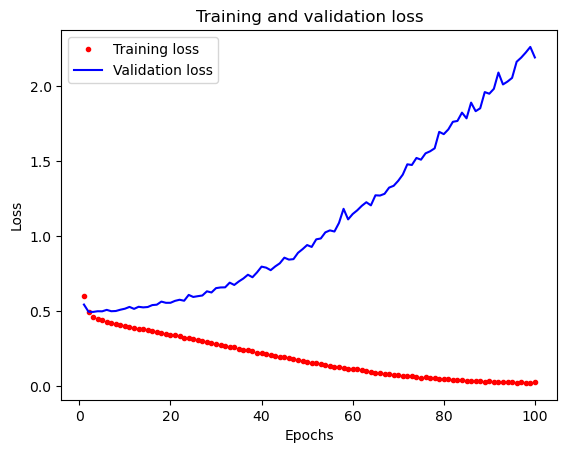

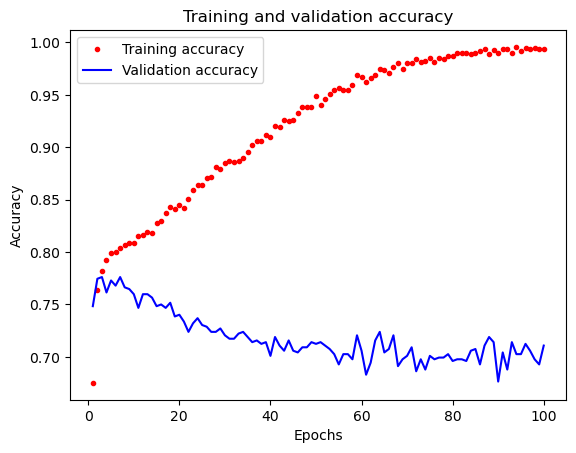

In [24]:
epochs = range(1, len(average_loss) + 1)
plt.plot(epochs, average_loss, "r.", label="Training loss")
plt.plot(epochs, average_val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, average_accu_history, "r.", label="Training accuracy")
plt.plot(epochs, average_val_accu_history, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## plot tronqué

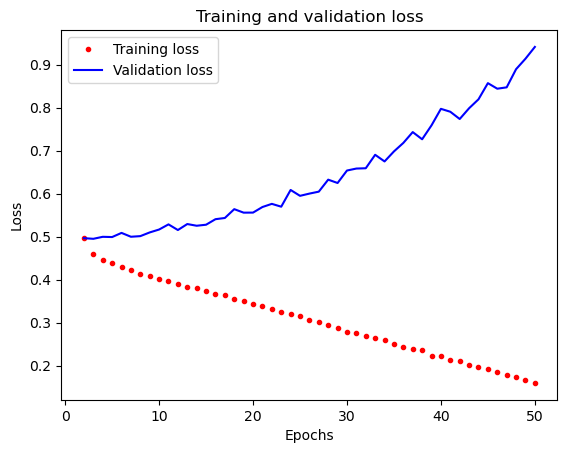

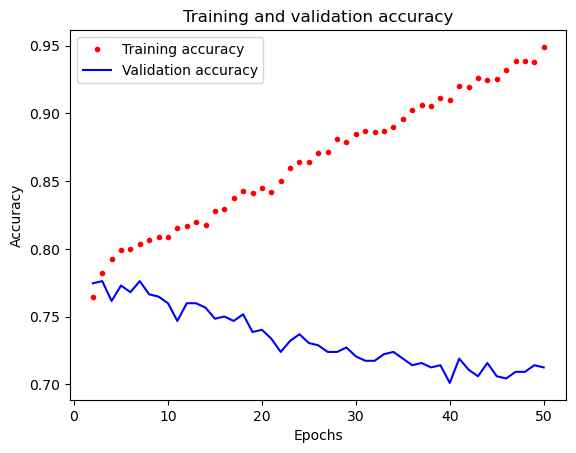

In [25]:
plt.plot(epochs[1:50], average_loss[1:50], "r.", label="Training loss")
plt.plot(epochs[1:50], average_val_loss[1:50], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs[1:50], average_accu_history[1:50], "r.", label="Training accuracy")
plt.plot(epochs[1:50], average_val_accu_history[1:50], "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [26]:
model = build_model()
model.fit(train_data, train_labels, 
          epochs=30, 
          batch_size=32)


Epoch 1/30
20/20 [==============================] - 0s 670us/step - loss: 0.5848 - accuracy: 0.6922
Epoch 2/30
20/20 [==============================] - 0s 662us/step - loss: 0.4935 - accuracy: 0.7671
Epoch 3/30
20/20 [==============================] - 0s 623us/step - loss: 0.4637 - accuracy: 0.7818
Epoch 4/30
20/20 [==============================] - 0s 598us/step - loss: 0.4548 - accuracy: 0.7850
Epoch 5/30
20/20 [==============================] - 0s 582us/step - loss: 0.4489 - accuracy: 0.7850
Epoch 6/30
20/20 [==============================] - 0s 493us/step - loss: 0.4402 - accuracy: 0.7948
Epoch 7/30
20/20 [==============================] - 0s 524us/step - loss: 0.4388 - accuracy: 0.7866
Epoch 8/30
20/20 [==============================] - 0s 499us/step - loss: 0.4304 - accuracy: 0.7932
Epoch 9/30
20/20 [==============================] - 0s 491us/step - loss: 0.4246 - accuracy: 0.7997
Epoch 10/30
20/20 [==============================] - 0s 478us/step - loss: 0.4238 - accuracy: 0.7932

In [27]:
predictions = model.predict(test_data)
# predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels


print(f"Le patient a {predictions[0][0]*100:.2f}% de chance de contracter la maladie")
print(f"Le modèle a une précision de {matches.mean()}% sur le test")

5/5 [==============================] - 0s 571us/step
Le patient a 91.01% de chance de contracter la maladie
Le modèle a une précision de 0.6428571428571429% sur le test
